In [2]:
import time
import datetime
import os
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import tushare as ts
ts.set_token('993df56f2f58d7cf01eb581421e762de4c45172b9979ae950bc1333a')
pro = ts.pro_api()

import mpl_finance as mpf
# import matplotlib.finance as mpf
import matplotlib.pyplot as plt
from matplotlib import ticker
from matplotlib.pylab import date2num
import matplotlib as mpl
import seaborn as sns
sns.set()
mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['font.sans-serif'] = 'SimHei'

D:\Users\admin\Anaconda3\envs\py37-stock\lib\site-packages\mpl_finance.py:22: DeprecationWarning: 



    Please use `mplfinance` instead (no hyphen, no underscore).

    To install: `pip install --upgrade mplfinance` 

   For more information, see: https://pypi.org/project/mplfinance/


  category=DeprecationWarning)


In [12]:
from mylab.mystock import plotStock
from mylab.mystock import getKdj
from mylab.mystock import displaySelect
from mylab.mystock import getMacd
from mylab.mystock import getStock
from mylab.mystock import getIndex
from mylab.mystock import mergeStockIndex
from mylab.mystock import getIndexBasic
from mylab.mystock import getStockBasic
from mylab.mystock import readData
from mylab.mystock import mergeDailyWeeklyMonthly
from mylab.mystock import extractFeature

# demo try

In [22]:
stock_code = "399001.SZ"
start_date = "20161001"
end_date = "20200314"
save_dir = "./output/industry/"

index_basic_df = getIndexBasic()
index_basic_df = index_basic_df.loc[(index_basic_df["category"] =="二级行业指数"), :]
index_basic_df.reset_index(drop = True, inplace = True)
print(index_basic_df.shape)
index_basic_df.head(6)

(7, 8)


,ts_code,name,market,publisher,category,base_date,base_point,list_date
0,398003.SZ,国证芯片,SZSE,深交所,二级行业指数,20021231,1000.0,20150217
1,399675.SZ,深互联网,SZSE,深交所,二级行业指数,20100630,1000.0,20150608
2,399951.SZ,300银行,SZSE,中证公司,二级行业指数,20041231,1000.0,20091028
3,399952.SZ,300地产,SZSE,中证公司,二级行业指数,20041231,1000.0,20091028
4,399957.SZ,300运输,SZSE,中证公司,二级行业指数,20041231,1000.0,20090616
5,399965.SZ,中证800地产,SZSE,中证公司,二级行业指数,20041231,1000.0,20140404


# get all industry index

In [13]:
def getIndexBasic(LOCAL = True, market = "SZSE" ):
    if LOCAL:
        pool_df = pd.read_csv("./data/index/index_basic_info_"+market+".csv")
    else:
        pool_df = pro.index_basic(market= market)
    return pool_df

def getIndexDaily(stock_code , start_date = "20100101", end_date = "20200314", LOCAL = True, market = "SZSE" ):
    dir_file = "./data/index/"+market+"/daily/"
    if LOCAL:
        daily_df = readData(dir_file, stock_code, start_date , end_date )
    else:
        daily_df = pro.index_daily(ts_code = stock_code,start_date = start_date, end_date = end_date )
    daily_df = restIndex(daily_df)
    return daily_df

def getIndexWeekly(stock_code, start_date = "20100101", end_date = "20200314", LOCAL = True, market = "SZSE" ):
    dir_file = "./data/index/"+market+"/weekly/"
    if LOCAL:
        daily_df = readData(dir_file, stock_code, start_date , end_date )
    else:
        daily_df = pro.index_weekly(ts_code = stock_code,start_date = start_date, end_date = end_date )
    daily_df = restIndex(daily_df)
    return daily_df

def getIndexMonthly(stock_code, start_date = "20100101", end_date = "20200314", LOCAL = True, market = "SZSE" ):
    dir_file = "./data/index/"+market+"/monthly/"
    if LOCAL:
        daily_df = readData(dir_file, stock_code, start_date , end_date )
    else:
        daily_df = pro.index_monthly(ts_code = stock_code,start_date = start_date, end_date = end_date )
    daily_df = restIndex(daily_df)
    return daily_df


In [23]:
# glean all industry index
start_date = "20161001"
end_date = "20200314"
save_dir = "./data/industry/"
markets = ["SSE","SW","SZSE","OTH"]

all_index_basic_df = pd.DataFrame()
for market in markets:
    for cat in ["一级行业指数","二级行业指数","三级行业指数","四级行业指数","行业指数"]:
        index_basic_df = getIndexBasic(LOCAL = True, market = market )
        index_basic_df = index_basic_df.loc[(index_basic_df["category"] == cat), :]
        print(market,cat, len(index_basic_df) )
        if len(index_basic_df) == 0:
            continue
        index_basic_df.reset_index(drop = True, inplace = True)
        all_index_basic_df = pd.concat([all_index_basic_df,index_basic_df],axis = 0)
        for i in range(len(index_basic_df)):
            try:
                stock_code = index_basic_df.loc[i,"ts_code"]
                stock_name = index_basic_df.loc[i,"name"]
                index_df = getIndexDaily(stock_code, start_date, end_date,LOCAL = True, market = market)
                index_df.to_csv(save_dir+"daily/"+ stock_code + stock_name + ".csv", index = False)
                index_df = getIndexWeekly(stock_code, start_date, end_date,LOCAL = True, market = market)
                index_df.to_csv(save_dir+"weekly/"+ stock_code + stock_name + ".csv", index = False)
                index_df = getIndexMonthly(stock_code, start_date, end_date,LOCAL = True, market = market)
                index_df.to_csv(save_dir+"monthly/"+ stock_code + stock_name + ".csv", index = False)
            except:
                pass
all_index_basic_df.to_csv(save_dir+ "all_industry_basic_info.csv", index = False)

SSE 一级行业指数 83
SSE 二级行业指数 5
SSE 三级行业指数 0
SSE 四级行业指数 0
SSE 行业指数 4
SW 一级行业指数 34
SW 二级行业指数 113
SW 三级行业指数 252
SW 四级行业指数 0
SW 行业指数 0
SZSE 一级行业指数 61
SZSE 二级行业指数 7
SZSE 三级行业指数 1
SZSE 四级行业指数 1
SZSE 行业指数 0
OTH 一级行业指数 1
OTH 二级行业指数 14
OTH 三级行业指数 0
OTH 四级行业指数 0
OTH 行业指数 0


# select Industry by KDJ

In [19]:
def getIndustryBasic( ):
    pool_df = pd.read_csv("./data/industry/all_industry_basic_info.csv")
    return pool_df

def getIndustryDaily(stock_code , start_date = "20100101", end_date = "20200314" ):
    dir_file = "./data/industry/daily/"
    daily_df = readData(dir_file, stock_code, start_date , end_date )
    daily_df = restIndex(daily_df)
    return daily_df

def getIndustryWeekly(stock_code, start_date = "20100101", end_date = "20200314" ):
    dir_file = "./data/industry/weekly/"
    daily_df = readData(dir_file, stock_code, start_date , end_date )
    daily_df = restIndex(daily_df)
    return daily_df

def getIndustryMonthly(stock_code, start_date = "20100101", end_date = "20200314" ):
    dir_file = "./data/industry/monthly/"
    daily_df = readData(dir_file, stock_code, start_date , end_date )
    daily_df = restIndex(daily_df)
    return daily_df

def getIndustry(stock_code,start_date = "20100101", end_date  = "20200314"  , LOCAL = True):
    daily_df = getIndustryDaily(stock_code,start_date, end_date )
    weekly_df = getIndustryWeekly(stock_code,start_date , end_date )
    monthly_df = getIndustryMonthly(stock_code,start_date , end_date )
    # KDJ and MACD
    daily_df = getKdj(daily_df)
    daily_df = getMacd(daily_df)
    weekly_df = getKdj(weekly_df)
    weekly_df = getMacd(weekly_df)
    monthly_df = getKdj(monthly_df)
    monthly_df = getMacd(monthly_df)
    # merge
    all_df = mergeDailyWeeklyMonthly(daily_df,weekly_df,monthly_df)
    return all_df

In [40]:
def selectByKdj(df, index_monthly_KDJ = True, index_weekly_KDJ = True):
    select_df = df.copy(deep = True)
    select_df = select_df.loc[select_df["D_monthly"].values < 70, :]
    select_df = select_df.loc[select_df["D_weekly"].values < 70, :]
    if index_weekly_KDJ:
        select_df = select_df.loc[select_df["K_weekly"].values >= select_df['D_weekly'].values, :]
    else:
        select_df = select_df.loc[select_df["K_weekly"].values < select_df['D_weekly'].values, :]
    if index_monthly_KDJ:
        select_df = select_df.loc[select_df["K_monthly"].values >= select_df['D_monthly'].values, :]
    else:
        select_df = select_df.loc[select_df["K_monthly"].values < select_df['D_monthly'].values, :]
    
    return select_df

In [57]:
# select industry
start_date = "20160101"
end_date = "20200313"

industry_basic_df = getIndustryBasic()
print(industry_basic_df.shape)
all_select_df = pd.DataFrame()

for i in range(len(industry_basic_df)):
    stock_code = industry_basic_df.loc[i,"ts_code"]
    stock_name = industry_basic_df.loc[i,"name"]
    try:
        industry_df = getIndustry(stock_code,start_date,end_date)
    except:
        continue
    select_df = selectByKdj(industry_df)
    if len(select_df) > 1:
        all_select_df = pd.concat([all_select_df,select_df],axis = 0)
    
all_select_df = all_select_df.loc[all_select_df["trade_date"] == end_date ,:]
all_select_df = pd.merge(all_select_df,industry_basic_df, how = "left", on = "ts_code")
all_select_df.reset_index(drop = True, inplace = True)
all_select_df.to_csv("./data/industry/all_select_industry.csv",index = False)
print(all_select_df.shape)
all_select_df.head()

(576, 8)
(9, 67)


,ts_code,trade_date,close,open,high,low,pre_close,change,pct_chg,vol,...,dea_monthly,macd_monthly,macd_signal_monthly,name,market,publisher,category,base_date,base_point,list_date
0,000034.SH,20200313,1986.7173,1915.2189,2005.1679,1911.9479,2001.7999,-15.0826,-0.7535,30095979.0,...,-46.154306,7.081579,0.0,上证工业,SSE,中证公司,一级行业指数,20031231.0,1000.0,20090109.0
1,000112.SH,20200313,7085.0307,6947.4415,7225.7673,6933.0288,7173.4528,-88.4221,-1.2326,4316116.0,...,-226.731230,106.565827,1.0,380电信,SSE,中证公司,一级行业指数,20031231.0,1000.0,20110613.0
2,399437.SZ,20200313,5816.2118,5576.6042,5885.8264,5569.0094,5860.4989,-44.2871,-0.7557,22691393.0,...,5.275548,156.871600,0.0,证券龙头,SZSE,深交所,一级行业指数,20021231.0,1000.0,20141230.0
3,399440.SZ,20200313,1108.3276,1092.6402,1119.9177,1087.1675,1129.3465,-21.0189,-1.8612,17428967.0,...,-100.931914,-22.608207,0.0,国证钢铁,SZSE,深交所,一级行业指数,20021231.0,1000.0,20141230.0
4,399622.SZ,20200313,1483.0609,1441.6421,1492.5746,1434.3952,1498.6563,-15.5954,-1.0406,5053476.0,...,-124.939145,18.628977,0.0,深证公用,SZSE,深交所,一级行业指数,20041231.0,1000.0,20110615.0


In [52]:
# plot industry weekly
start_date = "20100101"

for i in range(len(all_select_df)):
    stock_code = all_select_df.loc[i,"ts_code"]
    stock_name = all_select_df.loc[i,"name"]
    industry_df = getIndustryWeekly(stock_code, start_date, end_date)
    industry_df = getKdj(industry_df)
    industry_df = getMacd(industry_df)
    if len(industry_df)>10:
        plotStock(industry_df,SAVE = True ,save_dir = "./output/industry/select_industry/")
        plt.close()
        print(stock_code,stock_name)

000112.SH 380电信
000857.SH 中证500医药
399622.SZ 深证公用
399995.SZ 基建工程
399975.SZ 证券公司


## select stock by industry

In [78]:
# select stock by industry
stock_select_df = pd.DataFrame()
for i in range(len(index_select_df)):
    stock_code = index_select_df.loc[i,"ts_code"]
    stock_name = index_select_df.loc[i,"name"]
    try:
        df = pro.index_weight(index_code=stock_code, start_date='20200201', end_date='20200313')
        print(stock_name, len(df))
    except:
        pass
    stock_select_df  = pd.concat([stock_select_df,df],axis = 0)
stock_select_df.sort_values(by = "weight",ascending = False ,inplace = True)
stock_select_df.drop_duplicates(subset = "con_code", inplace = True)
stock_select_df.reset_index(drop = True, inplace = True)
stock_select_df.rename(columns = {"con_code":"ts_code"}, inplace = True)
print(stock_select_df.shape)
stock_select_df.head()

证券龙头 25
深证公用 20
基建工程 50
(95, 4)


,index_code,ts_code,trade_date,weight
0,399437.SZ,600030.SH,20200228,14.7804
1,399437.SZ,600837.SH,20200228,11.8995
2,399995.SZ,601668.SH,20200228,10.3730
3,399622.SZ,000690.SZ,20200228,10.2912
4,399995.SZ,601186.SH,20200228,9.8130


In [79]:
# merge basic info of stock
pool_df = getStockBasic(LOCAL = True)
stock_select_df = pd.merge(stock_select_df,pool_df, how = "left", on = "ts_code")
stock_select_df = stock_select_df.loc[stock_select_df["index_code"] == "399995.SZ",:]
stock_select_df.reset_index(drop = True, inplace = True)
print(stock_select_df.shape)
stock_select_df.head()

(50, 10)


,index_code,ts_code,trade_date,weight,symbol,name,area,industry,market,list_date
0,399995.SZ,601668.SH,20200228,10.373,601668,中国建筑,北京,建筑工程,主板,20090729
1,399995.SZ,601186.SH,20200228,9.813,601186,中国铁建,北京,建筑工程,主板,20080310
2,399995.SZ,601390.SH,20200228,9.517,601390,中国中铁,北京,建筑工程,主板,20071203
3,399995.SZ,601669.SH,20200228,7.873,601669,中国电建,北京,建筑工程,主板,20111018
4,399995.SZ,601800.SH,20200228,4.967,601800,中国交建,北京,建筑工程,主板,20120309


In [81]:
def selectStockByKdj(df, stock_monthly_KDJ = True, stock_weekly_KDJ = True ):
    select_df = df.copy(deep = True)
    select_df = select_df.loc[select_df["kdj_signal"] == 1, :]
    if stock_monthly_KDJ:
        select_df = select_df.loc[select_df["K_monthly"].values >= select_df['D_monthly'].values, :]
    else:
        select_df = select_df.loc[select_df["K_monthly"].values < select_df['D_monthly'].values, :]
    if stock_weekly_KDJ:
        select_df = select_df.loc[select_df["K_weekly"].values >= select_df['D_weekly'].values, :]
    else:
        select_df = select_df.loc[select_df["K_weekly"].values < select_df['D_weekly'].values, :]
    
    return select_df

In [34]:
def selectStockByMiniKdj(df, stock_monthly_KDJ = True, stock_weekly_KDJ = True ):
    select_df = df.copy(deep = True)
    select_df = select_df.loc[select_df["D"] <= 5, :]
    if stock_monthly_KDJ:
        select_df = select_df.loc[select_df["K_monthly"].values >= select_df['D_monthly'].values, :]
    else:
        select_df = select_df.loc[select_df["K_monthly"].values < select_df['D_monthly'].values, :]
    if stock_weekly_KDJ:
        select_df = select_df.loc[select_df["K_weekly"].values >= select_df['D_weekly'].values, :]
    else:
        select_df = select_df.loc[select_df["K_weekly"].values < select_df['D_weekly'].values, :]
    
    return select_df

In [32]:
all_select_df = pd.DataFrame()
for i in range(len(stock_select_df)):
    stock_code = stock_select_df.loc[i,"ts_code"]
    stock_name = stock_select_df.loc[i,"name"]
    if stock_code[0] == "3":
        continue
    if stock_name[0] == "*":
        continue
        
    stock_df = getStock(stock_code,start_date, end_date  , LOCAL = True)
    if len(stock_df) > 300:
        stock_df = stock_df.loc[stock_df["K_monthly"].values > stock_df['D_monthly'].values, :]
        stock_df = stock_df.loc[stock_df["K_weekly"].values > stock_df['D_weekly'].values , :]
        stock_df = stock_df.loc[stock_df["J"].values < 5  , :]
        all_select_df  = pd.concat([all_select_df,stock_df],axis = 0)
all_select_df = all_select_df.loc[all_select_df["trade_date"] == "20200313",:]
all_select_df.to_csv("./output/"+"stock_selected_by_industry_KDJ_df.csv", index = False)
print(all_select_df.shape)
all_select_df.head()

(6, 60)


,ts_code,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,...,K_monthly,D_monthly,J_monthly,kdj_signal_monthly,sema_monthly,lema_monthly,dif_monthly,dea_monthly,macd_monthly,macd_signal_monthly
1947,601800.SH,20200313,8.71,9.15,8.71,8.99,9.16,-0.17,-1.8559,781511.71,...,16.354582,13.230760,22.602225,1.0,9.948514,11.104753,-1.156238,-0.905376,-0.501725,0.0
1928,601669.SH,20200313,4.06,4.21,4.00,4.15,4.18,-0.03,-0.7177,476041.02,...,17.858857,15.773944,22.028682,1.0,4.632998,5.226662,-0.593664,-0.560975,-0.065378,0.0
2397,601618.SH,20200313,2.56,2.69,2.55,2.66,2.69,-0.03,-1.1152,907718.67,...,26.456951,18.328478,42.713896,0.0,2.905666,3.273728,-0.368062,-0.374051,0.011978,1.0
2442,600068.SH,20200313,6.40,6.65,6.35,6.57,6.66,-0.09,-1.3514,609612.61,...,53.132770,36.545362,86.307585,0.0,6.402080,6.911936,-0.509855,-0.607107,0.194503,0.0
2274,002051.SZ,20200313,8.81,8.98,8.67,8.82,9.15,-0.33,-3.6066,130068.67,...,14.458835,10.682994,22.010518,1.0,10.533538,13.170179,-2.636641,-2.690770,0.108259,0.0


In [33]:
all_select_df.ts_code.values

array(['601800.SH', '601669.SH', '601618.SH', '600068.SH', '002051.SZ',
       '000498.SZ'], dtype=object)

In [24]:
stock_select_df.shape
stock_select_df.head()

,index_code,ts_code,trade_date,weight,symbol,name,area,industry,market,list_date
0,399995.SZ,603959.SH,20200228,0.450,603959,百利科技,湖南,建筑工程,主板,20160517
1,399995.SZ,603098.SH,20200228,0.211,603098,森特股份,北京,装修装饰,主板,20161216
2,399995.SZ,601886.SH,20200228,0.729,601886,江河集团,北京,装修装饰,主板,20110818
3,399995.SZ,601800.SH,20200228,4.967,601800,中国交建,北京,建筑工程,主板,20120309
4,399995.SZ,601669.SH,20200228,7.873,601669,中国电建,北京,建筑工程,主板,20111018


In [35]:
stock_code = "000001.SZ"
start_date = "20100101"
end_date = "20200314"
save_dir = "./output/industry/select_stock_miniKDJ/"
index_code = "399995.SZ"


stock_monthly_KDJ = True
stock_weekly_KDJ = True

index_df = getIndex(index_code,start_date, end_date  , LOCAL = True)
stock_select_df = pro.index_weight(index_code=index_code, start_date='20200201', end_date='20200313')
stock_select_df.rename(columns = {"con_code":"ts_code"}, inplace = True)
pool_df = getStockBasic(LOCAL = True)
stock_select_df = pd.merge(stock_select_df,pool_df, how = "left", on = "ts_code")
print(stock_select_df.shape)
all_select_df = pd.DataFrame()
for i in range(len(stock_select_df)):
    stock_code = stock_select_df.loc[i,"ts_code"]
    stock_name = stock_select_df.loc[i,"name"]
    if stock_code[0] == "3":
        continue
    if stock_name[0] == "*":
        continue
        
    stock_df = getStock(stock_code,start_date, end_date  , LOCAL = True)
    stock_df = mergeStockIndex(stock_df,index_df)
    if len(stock_df) > 300:
        select_df = selectStockByMiniKdj(stock_df, index_monthly_MACD = True, index_weekly_KDJ = True, stock_monthly_KDJ = True, stock_weekly_KDJ = True )
        print(stock_name,stock_code,select_df.shape)
        if len(select_df) > 0:
            all_select_df  = pd.concat([all_select_df,select_df],axis = 0)
            for i in range(len(select_df)):
                ix = select_df.index[i]
                trade_date = select_df.trade_date.values[i]
                # print(ix)
                # print(trade_date)
                display_df = displaySelect(stock_df,ix, trade_date= trade_date, save_dir = save_dir )
                plt.close()
all_select_df.to_csv(save_dir+"all_select_df.csv", index = False)
print(all_select_df.shape)

(50, 10)
百利科技 603959.SH (4, 117)
森特股份 603098.SH (3, 117)
江河集团 601886.SH (3, 117)
中国交建 601800.SH (1, 117)
中国电建 601669.SH (8, 117)
中国建筑 601668.SH (5, 117)
中国中冶 601618.SH (5, 117)
中国核建 601611.SH (2, 117)
中国中铁 601390.SH (0, 117)
中国铁建 601186.SH (6, 117)
中国化学 601117.SH (1, 117)
中铝国际 601068.SH (0, 117)
中材国际 600970.SH (9, 117)
同济科技 600846.SH (4, 117)
隧道股份 600820.SH (0, 117)
腾达建设 600512.SH (1, 117)
安徽建工 600502.SH (0, 117)
龙元建设 600491.SH (0, 117)
杭萧钢构 600477.SH (10, 117)
浦东建设 600284.SH (1, 117)
上海建工 600170.SH (0, 117)
东湖高新 600133.SH (5, 117)
中船科技 600072.SH (1, 117)
葛洲坝 600068.SH (2, 117)
四川路桥 600039.SH (0, 117)
新疆交建 002941.SZ (0, 117)
岭南股份 002717.SZ (3, 117)
普邦股份 002663.SZ (0, 117)
天沃科技 002564.SZ (2, 117)
中化岩土 002542.SZ (6, 117)
广田集团 002482.SZ (2, 117)
棕榈股份 002431.SZ (8, 117)
亚厦股份 002375.SZ (1, 117)
洪涛股份 002325.SZ (3, 117)
东方园林 002310.SZ (7, 117)
北新路桥 002307.SZ (5, 117)
金螳螂 002081.SZ (10, 117)
浙江交科 002061.SZ (2, 117)
中工国际 002051.SZ (3, 117)
宝鹰股份 002047.SZ (0, 117)
中钢国际 000928.SZ (2, 117)
京蓝科技 00

# 申万行业分析

In [19]:
classify_df = pro.index_classify()
classify_df.to_csv("./data/industry/industry_classify_SI.csv", index = False)
print(classify_df.shape)
classify_df.tail()

(359, 3)


,index_code,industry_name,level
354,851911.SI,银行,L3
355,851931.SI,证券,L3
356,851941.SI,保险,L3
357,851921.SI,多元金融,L3
358,852311.SI,综合,L3


In [22]:
# agg all menber stock
all_menber_df = pd.DataFrame()
for index_code in classify_df.index_code.values:
    time.sleep(0.8)
    menber_df = pro.index_member(index_code=index_code)
    all_menber_df = pd.concat([all_menber_df,menber_df])
all_menber_df = pd.merge(all_menber_df,classify_df, on = "index_code", how = "left" )
all_menber_df.to_csv("./data/industry/industry_menber_SI.csv", index = False)
print(all_menber_df.shape)
all_menber_df.tail()

(10968, 6)


,index_code,con_code,in_date,out_date,industry_name,level
10963,852311.SI,600139.SH,20170703,None,综合,L3
10964,852311.SI,600784.SH,20170703,None,综合,L3
10965,852311.SI,600805.SH,20170703,None,综合,L3
10966,852311.SI,603183.SH,20170912,None,综合,L3
10967,852311.SI,300797.SZ,20191108,None,综合,L3


In [14]:
# get index weekly
df = pro.index_weekly(ts_code ='850531.SI')
print(df.shape)
df.head()

(310, 11)


,ts_code,trade_date,close,open,high,low,pre_close,change,pct_chg,vol,amount
0,850531.SI,20200313,6530.67,7525.60,7542.43,6122.31,7442.07,-911.40,-0.1225,3.745480e+09,3.340735e+10
1,850531.SI,20200306,7339.96,6927.44,7473.27,6893.12,7033.67,306.29,0.0435,2.781080e+09,2.809822e+10
2,850531.SI,20200228,7475.32,8053.23,8134.96,7266.15,7745.42,-270.10,-0.0349,4.137560e+09,4.560876e+10
3,850531.SI,20200221,7418.66,7115.57,7577.37,7043.57,7086.60,332.06,0.0469,2.980450e+09,2.915609e+10
4,850531.SI,20200214,7086.60,6643.71,7183.97,6562.19,6664.31,422.29,0.0634,3.424450e+09,2.859229e+10


0

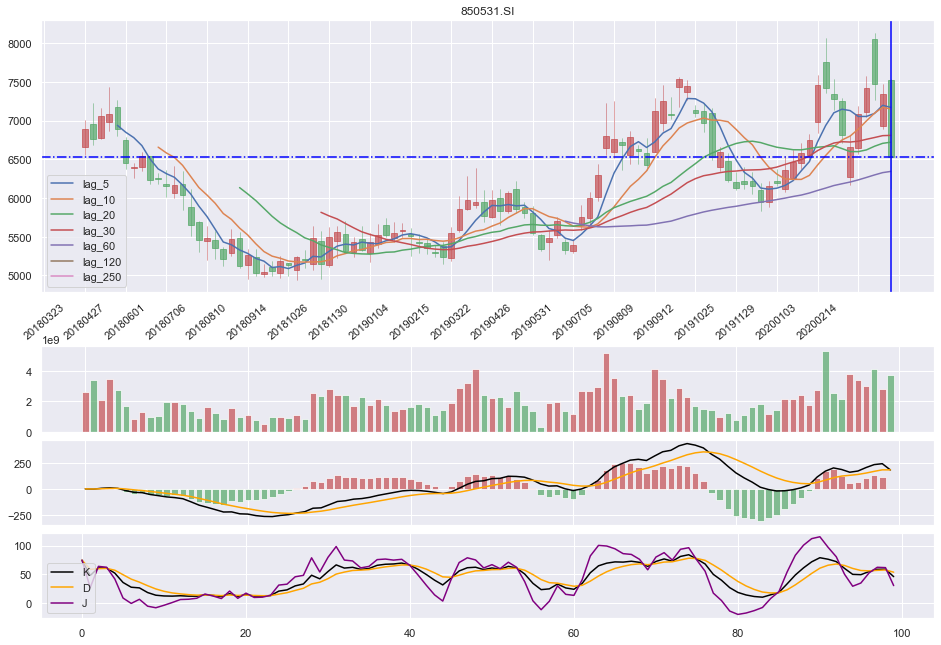

In [15]:
# plot
df = df.iloc[:100, :]
df = extractFeature(df)
plotStock(df)